In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
import spinesTS
spinesTS.__version__

'0.3.12'

In [3]:
from spinesTS.preprocessing import split_series
from spinesTS.plotting import plot2d
from sklearn.metrics import r2_score

In [4]:
from spinesTS.data import BuiltInSeriesData
from spinesTS.nn import *
from spinesTS.metrics import mean_absolute_error
from spinesTS.metrics import mean_absolute_percentage_error

In [5]:
series_data = BuiltInSeriesData()

+----+----------------------+----------------------------------------------------------------------+
|    | ds name              | columns                                                              |
+----+----------------------+----------------------------------------------------------------------+
|  0 | AirPassengers        | Month, #Passengers                                                   |
|  1 | ETTh1                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  2 | ETTh2                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  3 | ETTm1                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  4 | ETTm2                | date, HUFL, HULL, MUFL, MULL, LUFL, LULL, OT                         |
|  5 | Electric_Production  | date, value                                                          |
|  6 | M3_monthly_FTS       | series_id, method_id, forecast, horizon, timestamp, origin_ti

In [12]:
cs = series_data['ETTh1']

x_train, x_test, y_train, y_test = split_series(cs['OT'], cs['OT'], 60, 40, train_size=0.9)

In [13]:
x_train.shape, x_test.shape

((15588, 60), (1733, 60))

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

scaler2 = MinMaxScaler()
y_train = scaler2.fit_transform(y_train)
y_test = scaler2.transform(y_test)

In [ ]:
from spinesTS.nn._seg_rnn import SegRNN

model = SegRNN(60, 40, random_seed=42, loss_fn='mae', learning_rate=0.001, dropout=0.1,
                    device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=True, lr_scheduler=None)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))

y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

Using cpu backend
Epoch 1/3000  
488/488 - p0 - loss: 0.0176 - mae: 0.0802 - val_loss: 0.0939 - val_mae: 0.0939 - 2.83s/epoch - 0.006s/step
Epoch 2/3000  
488/488 - p0 - loss: 0.0385 - mae: 0.0698 - val_loss: 0.0819 - val_mae: 0.0819 - 2.78s/epoch - 0.006s/step
Epoch 3/3000  
488/488 - p0 - loss: 0.0754 - mae: 0.0699 - val_loss: 0.0450 - val_mae: 0.0450 - 2.78s/epoch - 0.006s/step
Epoch 4/3000  
488/488 - p0 - loss: 0.0812 - mae: 0.0702 - val_loss: 0.0410 - val_mae: 0.0410 - 2.78s/epoch - 0.006s/step
Epoch 5/3000  
488/488 - p1 - loss: 0.0743 - mae: 0.0702 - val_loss: 0.0423 - val_mae: 0.0423 - 2.81s/epoch - 0.006s/step
Epoch 6/3000  
488/488 - p2 - loss: 0.0686 - mae: 0.0697 - val_loss: 0.0442 - val_mae: 0.0442 - 2.84s/epoch - 0.006s/step
Epoch 7/3000  
488/488 - p3 - loss: 0.0690 - mae: 0.0696 - val_loss: 0.0470 - val_mae: 0.0470 - 2.83s/epoch - 0.006s/step
Epoch 8/3000  
488/488 - p0 - loss: 0.0683 - mae: 0.0688 - val_loss: 0.0406 - val_mae: 0.0406 - 2.78s/epoch - 0.006s/step
Epoch 

# StackingRNN

Using cpu backend
Epoch 1/3000  
7/7 - p0 - loss: 0.1804 - mae: 0.3412 - val_loss: 0.2040 - val_mae: 0.2040 - 0.10s/epoch - 0.015s/step
Epoch 2/3000  
7/7 - p0 - loss: 0.1999 - mae: 0.2297 - val_loss: 0.1615 - val_mae: 0.1615 - 0.08s/epoch - 0.011s/step
Epoch 3/3000  
7/7 - p0 - loss: 0.1604 - mae: 0.1955 - val_loss: 0.1402 - val_mae: 0.1402 - 0.08s/epoch - 0.011s/step
Epoch 4/3000  
7/7 - p0 - loss: 0.1225 - mae: 0.1707 - val_loss: 0.1390 - val_mae: 0.1390 - 0.08s/epoch - 0.011s/step
Epoch 5/3000  
7/7 - p0 - loss: 0.1387 - mae: 0.1763 - val_loss: 0.1273 - val_mae: 0.1273 - 0.08s/epoch - 0.012s/step
Epoch 6/3000  
7/7 - p1 - loss: 0.1200 - mae: 0.1370 - val_loss: 0.1289 - val_mae: 0.1289 - 0.08s/epoch - 0.012s/step
Epoch 7/3000  
7/7 - p0 - loss: 0.1083 - mae: 0.1095 - val_loss: 0.0972 - val_mae: 0.0972 - 0.08s/epoch - 0.011s/step
Epoch 8/3000  
7/7 - p0 - loss: 0.1029 - mae: 0.0999 - val_loss: 0.0970 - val_mae: 0.0970 - 0.07s/epoch - 0.011s/step
Epoch 9/3000  
7/7 - p1 - loss: 0.0910

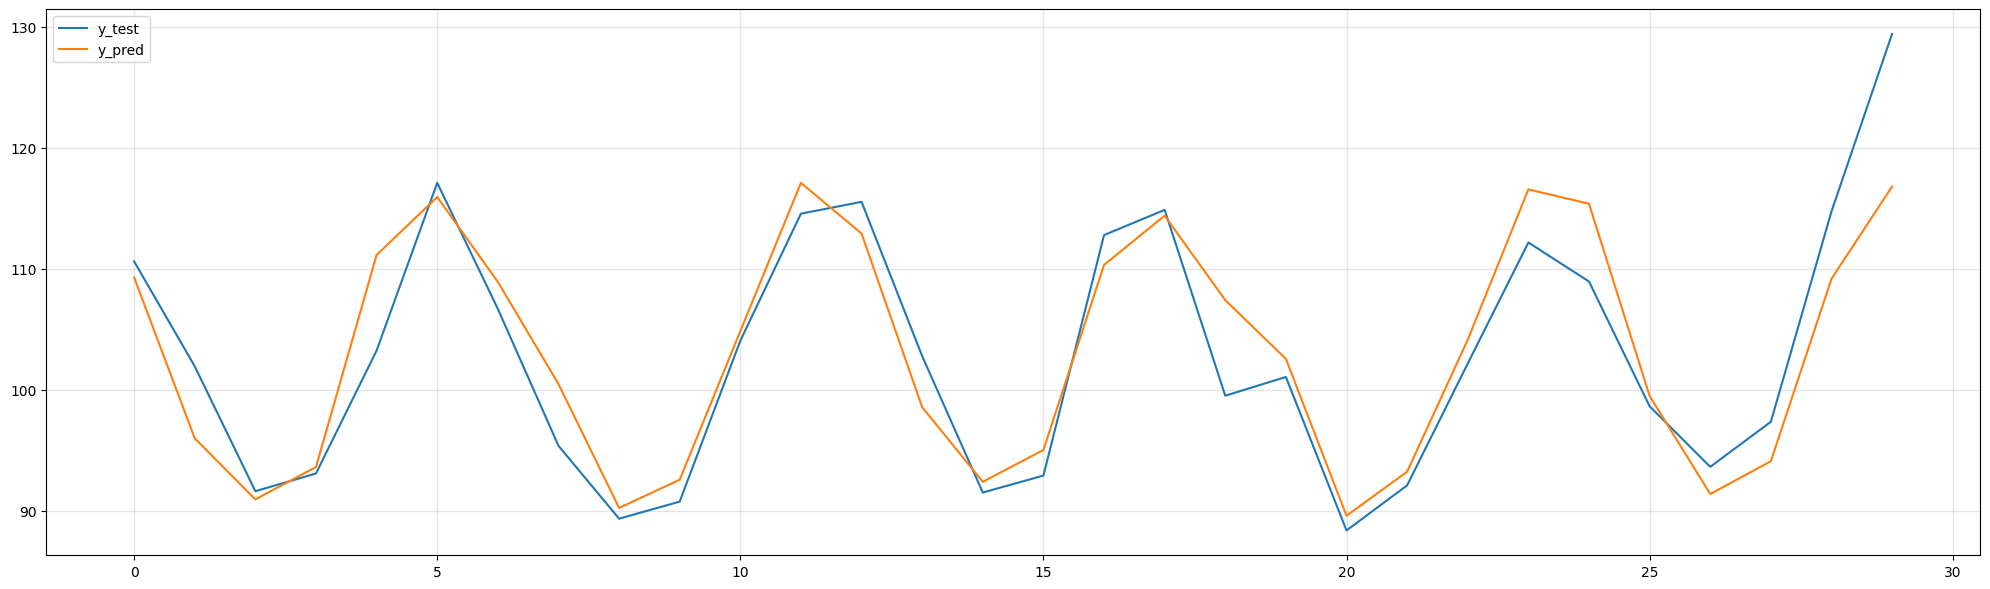

In [9]:
model = StackingRNN(128, 30, random_seed=42, loss_fn='mae', learning_rate=0.001, dropout=0.1,
                    device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=True, lr_scheduler=None)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))

y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

# GAUNet

Using cpu backend
Epoch 1/3000  
1/1 - p0 - loss: 0.2649 - mae: 0.2649 - val_loss: 0.6580 - val_mae: 0.6580 - 0.01s/epoch - 0.014s/step
Epoch 2/3000  
1/1 - p0 - loss: 0.2446 - mae: 0.2446 - val_loss: 0.6109 - val_mae: 0.6109 - 0.01s/epoch - 0.008s/step
Epoch 3/3000  
1/1 - p0 - loss: 0.2269 - mae: 0.2269 - val_loss: 0.5672 - val_mae: 0.5672 - 0.01s/epoch - 0.008s/step
Epoch 4/3000  
1/1 - p0 - loss: 0.2109 - mae: 0.2109 - val_loss: 0.5288 - val_mae: 0.5288 - 0.01s/epoch - 0.007s/step
Epoch 5/3000  
1/1 - p0 - loss: 0.1955 - mae: 0.1955 - val_loss: 0.4957 - val_mae: 0.4957 - 0.01s/epoch - 0.007s/step
Epoch 6/3000  
1/1 - p0 - loss: 0.1805 - mae: 0.1805 - val_loss: 0.4677 - val_mae: 0.4677 - 0.01s/epoch - 0.007s/step
Epoch 7/3000  
1/1 - p0 - loss: 0.1665 - mae: 0.1665 - val_loss: 0.4446 - val_mae: 0.4446 - 0.01s/epoch - 0.007s/step
Epoch 8/3000  
1/1 - p0 - loss: 0.1521 - mae: 0.1521 - val_loss: 0.4265 - val_mae: 0.4265 - 0.01s/epoch - 0.006s/step
Epoch 9/3000  
1/1 - p0 - loss: 0.1386

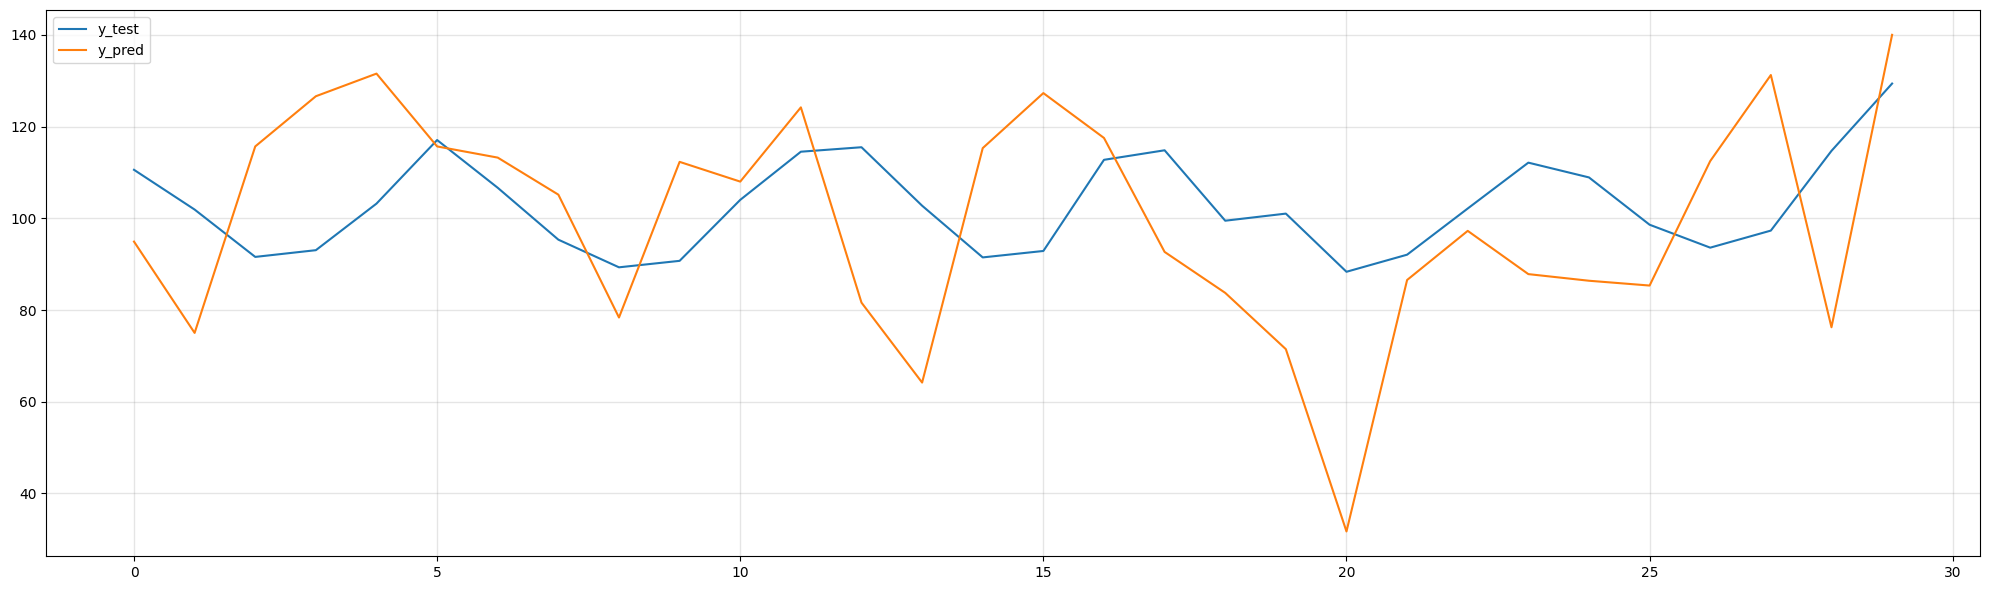

In [13]:
model = GAUNet(128, 30, random_seed=42, flip_features=False, learning_rate=0.001, level=2, device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=True, lr_scheduler=None)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))
y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

# Time2VecNet

Using cpu backend
Epoch 1/3000  
7/7 - p0 - loss: 0.2998 - mae: 0.3687 - val_loss: 0.2898 - val_mae: 0.2898 - 0.04s/epoch - 0.006s/step
Epoch 2/3000  
7/7 - p0 - loss: 0.2420 - mae: 0.2415 - val_loss: 0.2505 - val_mae: 0.2505 - 0.03s/epoch - 0.004s/step
Epoch 3/3000  
7/7 - p0 - loss: 0.2044 - mae: 0.2027 - val_loss: 0.2173 - val_mae: 0.2173 - 0.03s/epoch - 0.004s/step
Epoch 4/3000  
7/7 - p0 - loss: 0.1559 - mae: 0.1566 - val_loss: 0.1842 - val_mae: 0.1842 - 0.03s/epoch - 0.004s/step
Epoch 5/3000  
7/7 - p0 - loss: 0.1354 - mae: 0.1354 - val_loss: 0.1653 - val_mae: 0.1653 - 0.03s/epoch - 0.004s/step
Epoch 6/3000  
7/7 - p0 - loss: 0.1189 - mae: 0.1185 - val_loss: 0.1533 - val_mae: 0.1533 - 0.03s/epoch - 0.004s/step
Epoch 7/3000  
7/7 - p0 - loss: 0.1092 - mae: 0.1068 - val_loss: 0.1476 - val_mae: 0.1476 - 0.03s/epoch - 0.004s/step
Epoch 8/3000  
7/7 - p0 - loss: 0.0950 - mae: 0.0974 - val_loss: 0.1396 - val_mae: 0.1396 - 0.03s/epoch - 0.004s/step
Epoch 9/3000  
7/7 - p0 - loss: 0.0892

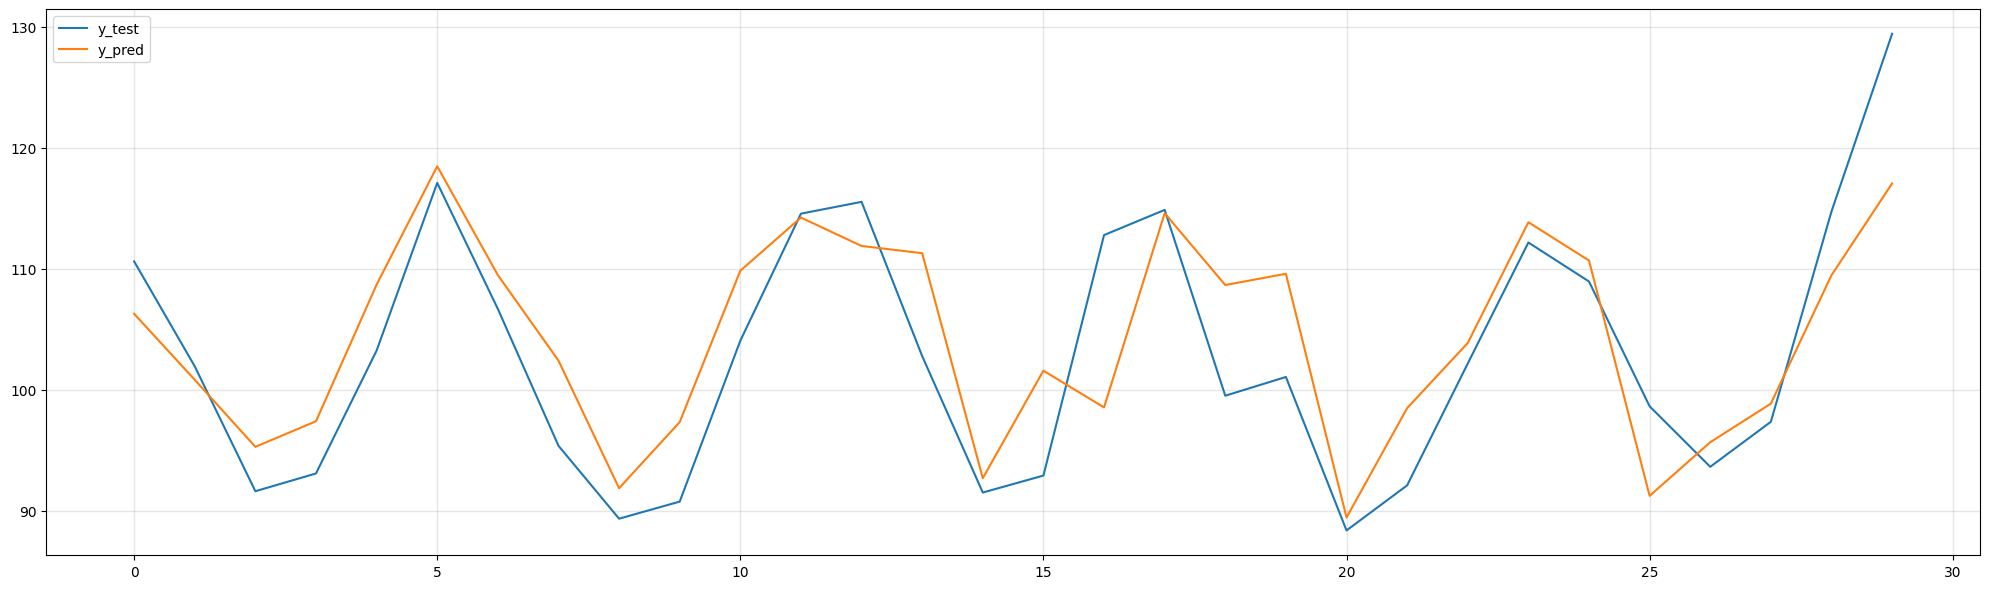

In [20]:
model = Time2VecNet(128, 30, random_seed=42, flip_features=False, learning_rate=0.001, device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=True, lr_scheduler='ReduceLROnPlateau')

y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))
y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

# SegRNN

In [9]:
from spinesTS.nn._seg_rnn import SegRNN

model = SegRNN(128, 30, random_seed=42, loss_fn='mae', learning_rate=0.001, dropout=0.1,
                    device='cpu')
model.fit(x_train, y_train, eval_set=(x_test, y_test), batch_size=32,
             min_delta=0, patience=100, epochs=3000, verbose=True, lr_scheduler=None)
y_pred_inverse = scaler2.inverse_transform(model.predict(x_test))

y_test_inverse = scaler2.inverse_transform(y_test)

print(f"r2: {r2_score(y_test_inverse.T, y_pred_inverse.T)}")
print(f"mae: {mean_absolute_error(y_test_inverse, y_pred_inverse)}")
print(f"mape: {mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)}")
a = plot2d(y_test_inverse, y_pred_inverse, eval_slices='[-1]', labels=['y_test', 'y_pred'], figsize=(20, 6))

Using cpu backend


ValueError: Found input variables with inconsistent numbers of samples: [32, 30]